For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.
 

# 1. Has the network latency gone up since we switched internet service providers?


H₀ = The network latency has not changed or decreased since we switched internet service providers.

Hₐ = The network latency has increased since we switched internet service providers.


Type I error = I determine that the network latency has increased when it has actually stayed the same. <br>
True negative = I determine that the network latency has stayed the same and not decreased. <br>
True positive = I determine that the network latency has increased. <br>
Type II error = I determine that the network latency has stayed the same when it has actually increased.


# 2. Is the website redesign any good?


H₀ = The website design has no difference in sales.

Hₐ = There has been an increase in sales since redesigning the website.

Type I error = I determine that the number of sales has increased when it has actually has stayed the same. <br>
True negative = I determine that the number of sales has stayed. <br>
True positive = I determine that the number of sales has increased.  <br>
Type II error = I determine that the number of sales has stayed the same when it has actually increased. <br>


# 3. Is our television ad driving more sales?


H₀ = The TV ads has no difference in sales (stayed the same or decreased).

Hₐ = There has been an increase in sales since delivering the TV ads.

Type I error = I determine that the number of sales has increased when it has actually has stayed the same. <br>
True negative = I determine that the number of sales has stayed. <br>
True positive = I determine that the number of sales has increased.  <br>
Type II error = I determine that the number of sales has stayed the same when it has actually increased. <br>



## Questions from t-test lesson

Answer with the type of test you would use (assume normal distribution):

1. Is there a difference in grades of students on the second floor compared to grades of all students?
 - Are adults who drink milk taller than adults who dont drink milk?
 - Is the the price of gas higher in texas or in new mexico? 
 - Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [ ]:
# independent t-test: two sample t-test
# independent t-test: two sample t-test
# independent t-test: two sample t-test
# ANOVA 

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. <br> A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. <br> Use a .05 level of significance.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pydataset import data

$H_0$: Average time to sell a house at office 1 == average time to sell at office 2 <br>
$H_a$: Average time to sell a house at office 1 ≠ average time to sell at office 2

In [2]:
𝜶 = 0.05

In [3]:
# using scipy to calculate t & p

t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)


t, p

(-2.7091418459143854, 0.00811206270346016)

In [4]:
if p < 𝜶:
    print("We reject the H₀")
else:
    print("We fail to reject the H₀")

We reject the H₀


Load the mpg dataset and use it to answer the following questions:

3. Is there a difference in fuel-efficiency in cars from 2008 vs 1999? <br>

In [5]:
mpg = data('mpg')

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [6]:
mpg['fuel_efficiency'] = mpg[['cty', 'hwy']].mean(axis = 1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [7]:
fuel_2008 = mpg[mpg.year == 2008].fuel_efficiency
fuel_1999 = mpg[mpg.year == 1999].fuel_efficiency


$H_0$: There is no difference in fuel-efficiency in cars from 2008 and 1999<br>
$H_a$: There is a difference in fuel-efficiency in cars from 2008 and 1999

In [8]:
𝜶 = 0.05

<AxesSubplot:>

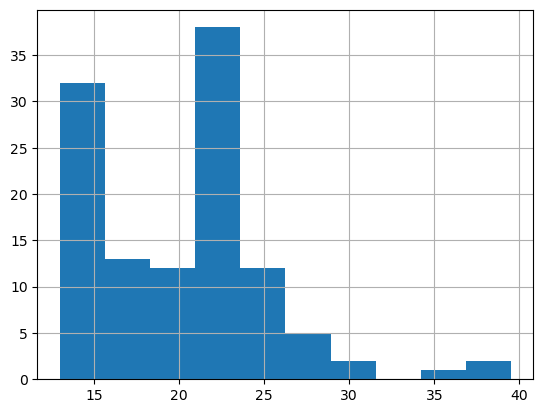

In [9]:
fuel_1999.hist()

<AxesSubplot:>

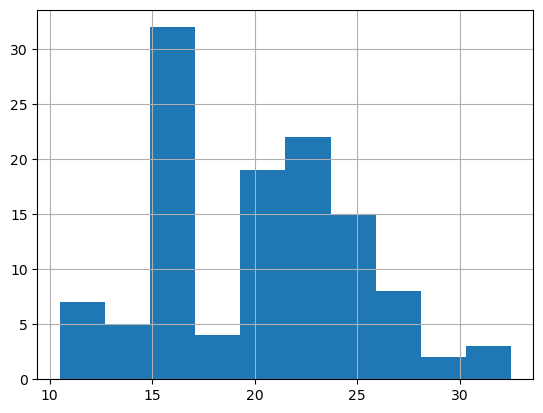

In [10]:
fuel_2008.hist()

In [11]:
fuel_2008.var(), fuel_1999.var()

(24.097480106100797, 27.122605363984682)

In [12]:
stats.levene(fuel_1999,fuel_2008)

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

In [13]:
t, p = stats.ttest_ind(fuel_2008, fuel_1999)
t, p

(-0.21960177245940962, 0.8263744040323578)

In [14]:
if p < 𝜶:
    print('We reject the H₀')
else:
    print('We fail to reject the H₀')

We fail to reject the H₀


- Are compact cars more fuel-efficient than the average car?

$H_0$: MPG for compact cars <= mpg for the average car<br>
$H_a$: MPG for compact cars > mpg for the average car

In [15]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [16]:
compact_cars = mpg[mpg['class'] == 'compact']
compact_cars['class'].count()

47

In [17]:
mpg_compact = mpg[mpg['class'] == 'compact'].fuel_efficiency
mpg_mean = mpg.fuel_efficiency.mean()

In [20]:
mpg_compact_mean = mpg_compact.mean()

In [22]:
mpg_compact_mean, mpg_mean

(24.21276595744681, 20.14957264957265)

<AxesSubplot:>

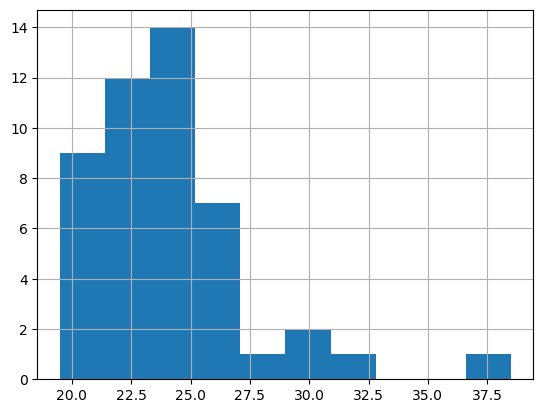

In [23]:
mpg_compact.hist()

In [24]:
stats.ttest_1samp(mpg_compact, mpg_mean)

Ttest_1sampResult(statistic=7.896888573132533, pvalue=4.1985637943171486e-10)

In [26]:
if ((p/2) < 𝜶) and t > 0:
    print('We reject the H₀')
else:
    print('We fail to reject the H₀')

We fail to reject the H₀


 - Do manual cars get better gas mileage than automatic cars?

$H_0$: MPG for manual cars <= mpg for automatic cars<br>
$H_a$: MPG for manual cars > mpg for automatic cars

In [27]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufacturer     234 non-null    object 
 1   model            234 non-null    object 
 2   displ            234 non-null    float64
 3   year             234 non-null    int64  
 4   cyl              234 non-null    int64  
 5   trans            234 non-null    object 
 6   drv              234 non-null    object 
 7   cty              234 non-null    int64  
 8   hwy              234 non-null    int64  
 9   fl               234 non-null    object 
 10  class            234 non-null    object 
 11  fuel_efficiency  234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [28]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [29]:
mpg['trans'].unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [30]:
manual_cars = mpg[mpg['trans'].str.contains('m')]
automatic_cars = mpg[mpg['trans'].str.contains('auto')]

manual_cars.trans.count(), automatic_cars.trans.count()

(77, 157)

In [31]:
mpg_manuals = manual_cars.fuel_efficiency
mpg_automatic = automatic_cars.fuel_efficiency

<AxesSubplot:>

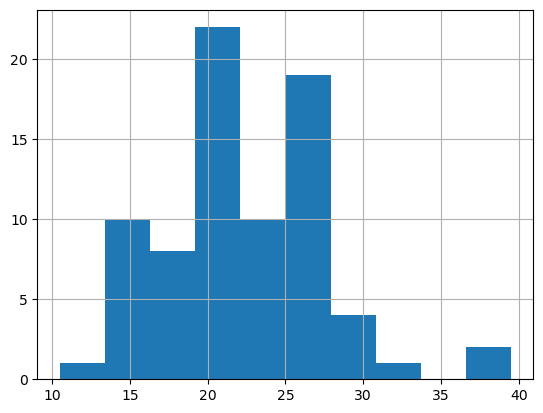

In [32]:
mpg_manuals.hist()

<AxesSubplot:>

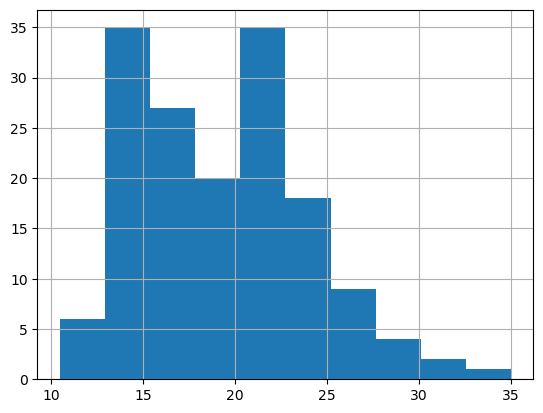

In [33]:
mpg_automatic.hist()

In [34]:
mpg_manuals.var(), mpg_automatic.var()

(26.635167464114826, 21.942777233382337)

In [35]:
stats.levene(mpg_manuals, mpg_automatic)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [36]:
t, p = stats.ttest_ind(mpg_manuals, mpg_automatic, equal_var=True)
t, p/2

(4.593437735750014, 3.5771872005728424e-06)

In [37]:
mpg_manuals.mean(), mpg_automatic.mean()

(22.227272727272727, 19.130573248407643)

In [38]:
if (p/2 < 𝜶) and t > 0:
    print('We reject the H₀')
else:
    print('We fail to reject the H₀')

We reject the H₀
